In [25]:
import keras
from keras.datasets import reuters

In [26]:
(train_features,train_labels), (test_features,test_labels) = reuters.load_data(num_words=10000)

In [27]:
import numpy as np
def multi_hot_encode(sequences,num_classes):
    results = np.zeros((len(sequences),num_classes))
    for i,seq in enumerate(sequences):
        results[i][seq] = 1.0
    return results

In [28]:
xtrain = multi_hot_encode(train_features,10000)
xtest = multi_hot_encode(test_features,10000)

In [29]:
from keras.utils import to_categorical
ytrain = to_categorical(train_labels)
ytest = to_categorical(test_labels)

In [30]:
ytrain.shape

(8982, 46)

In [31]:
from keras import layers

model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax'),
])

In [32]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3,
    name = 'top_3_accuracy',
)

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy',top_3_accuracy],
)

In [34]:
history = model.fit(
    xtest,ytrain,epochs=20,batch_size=512,validation_split=0.2
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1403 - loss: 3.7585 - top_3_accuracy: 0.2389 - val_accuracy: 0.3489 - val_loss: 3.5894 - val_top_3_accuracy: 0.4867
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3424 - loss: 3.4381 - top_3_accuracy: 0.5546 - val_accuracy: 0.3489 - val_loss: 3.2842 - val_top_3_accuracy: 0.5533
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3419 - loss: 3.1142 - top_3_accuracy: 0.5674 - val_accuracy: 0.3489 - val_loss: 3.0532 - val_top_3_accuracy: 0.5533
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3430 - loss: 2.8825 - top_3_accuracy: 0.5768 - val_accuracy: 0.3511 - val_loss: 2.9141 - val_top_3_accuracy: 0.5800
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3964 - loss: 2.6900 - top_3_accuracy: 0.6325 - val_accuracy: 0.3444 - val_loss: 2.8068 - val_top_3_accuracy: 0.5978
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4315 - loss: 2.5010 - top_3_accuracy: 0.64

In [35]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['accuracy', 'loss', 'top_3_accuracy', 'val_accuracy', 'val_loss', 'val_top_3_accuracy'])

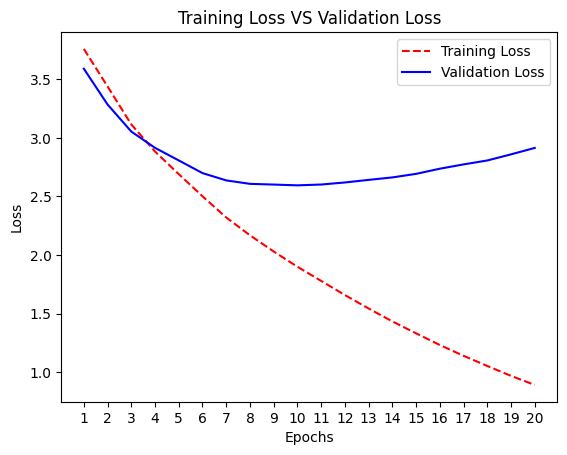

In [36]:
import matplotlib.pyplot as plt
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'r--',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xticks(epochs)
plt.title('Training Loss VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

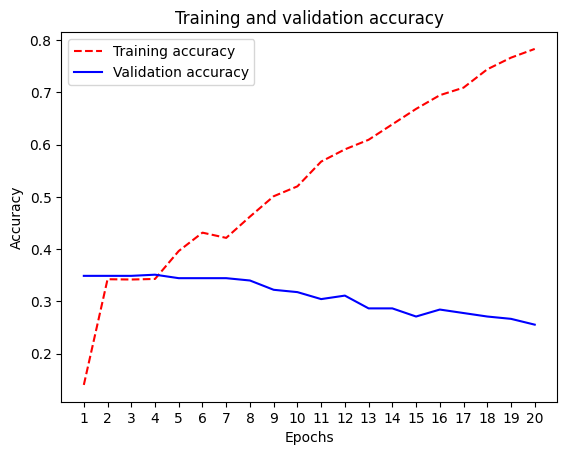

In [37]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

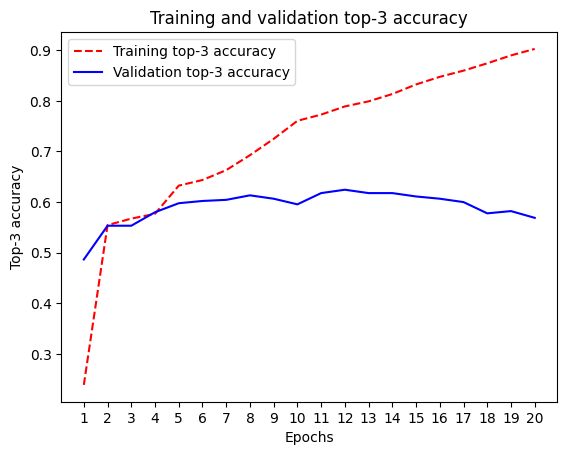

In [38]:
plt.clf()
acc = history.history["top_3_accuracy"]
val_acc = history.history["val_top_3_accuracy"]
plt.plot(epochs, acc, "r--", label="Training top-3 accuracy")
plt.plot(epochs, val_acc, "b", label="Validation top-3 accuracy")
plt.title("Training and validation top-3 accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Top-3 accuracy")
plt.legend()
plt.show()

In [39]:
model_final = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)
model_final.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model_final.fit(
    xtrain,
    ytrain,
    epochs=9,
    batch_size=512,
)
results = model_final.evaluate(xtest, ytest)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4370 - loss: 3.2564
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6198 - loss: 1.9697
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 1.3209
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7829 - loss: 1.0100
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8367 - loss: 0.7966
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8772 - loss: 0.6203
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.4790
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9232 - loss: 0.3710
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9370 - loss: 0.2944
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.9288  


In [40]:
results

[0.9287595152854919, 0.7943009734153748]